# Bicol University Workshop: Preliminaries on Data (Part 1)
Prepared by: John Raymond B. Barajas

## Confidentiality Notice

This Jupyter Notebook and its contents are confidential and intended solely for the use of the intended recipient(s). If you have received this Notebook in error, please notify the sender immediately and delete it from your system. Any unauthorized use, disclosure, copying, or distribution of this Notebook is strictly prohibited.

The information contained in this Notebook may be privileged and confidential, and is intended only for the named recipient(s). Any review, dissemination, distribution, or copying of this Notebook by anyone other than the intended recipient(s) is strictly prohibited.

The content and opinions expressed in this Notebook are those of the author(s) and may not necessarily reflect the official policies or positions of the organization. Any views or opinions presented in this Notebook are solely those of the author(s) and do not necessarily represent those of the organization.

The security and integrity of the content of this Notebook cannot be guaranteed, and the author(s) shall not be held responsible for any unauthorized modification or alteration of the content.

Please treat this Notebook and its contents with the utmost confidentiality and refrain from sharing or distributing it without explicit permission from the author(s) or the organization.

Thank you for your cooperation and understanding.

## Install Necessary Libraries

In [1]:
# !pip install pandas
# !pip install openpyxl
# !pip install matplotlib
# !pip install seaborn
# !pip install ipywidgets
# !pip install scikit-learn
# !pip install scipy
# !pip install "numpy<1.24"

## Import Necessary Libraries

In [2]:
# import the necessary libraries/packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read First the Data

In [3]:
# read Data
# change the file path for new data
file_path = 'fhe_raw_data.csv'
df = pd.read_csv(file_path)

## Check Metadata of Data

In [4]:
# check the first 5 rows of the data
df.head(5)

,REGION,HEI_NAME,HEI_TYPE,HEI_CITY,HEI_PROVINCE,FHE_GRANTEES,SEX_M,SEX_F,NOT_INDICATED,YEAR
0,01 - Ilocos Region,Binalatongan Community College,LUC,SAN CARLOS CITY,PANGASINAN,721,290,431,NaN,2018-2019
1,01 - Ilocos Region,Don Mariano Marcos Memorial State University,SUC,SAN FERNANDO CITY,LA UNION,11726,5280,6446,NaN,2018-2019
2,01 - Ilocos Region,Ilocos Sur Community College,LUC,VIGAN CITY,ILOCOS SUR,987,412,575,NaN,2018-2019
3,01 - Ilocos Region,Ilocos Sur Polytechnic State College,SUC,SANTA MARIA,ILOCOS SUR,4392,2007,2385,-,2018-2019
4,01 - Ilocos Region,Mariano Marcos State University,SUC,BATAC CITY,ILOCOS NORTE,7823,3250,4573,-,2018-2019


In [5]:
# check metadata of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   REGION         936 non-null    object
 1   HEI_NAME       936 non-null    object
 2   HEI_TYPE       936 non-null    object
 3   HEI_CITY       936 non-null    object
 4   HEI_PROVINCE   936 non-null    object
 5   FHE_GRANTEES   936 non-null    int64 
 6   SEX_M          936 non-null    object
 7   SEX_F          936 non-null    object
 8   NOT_INDICATED  285 non-null    object
 9   YEAR           936 non-null    object
dtypes: int64(1), object(9)
memory usage: 73.3+ KB


### Convert Columns into the Correct Data Types

#### Identify Numerical and Categorical Columns

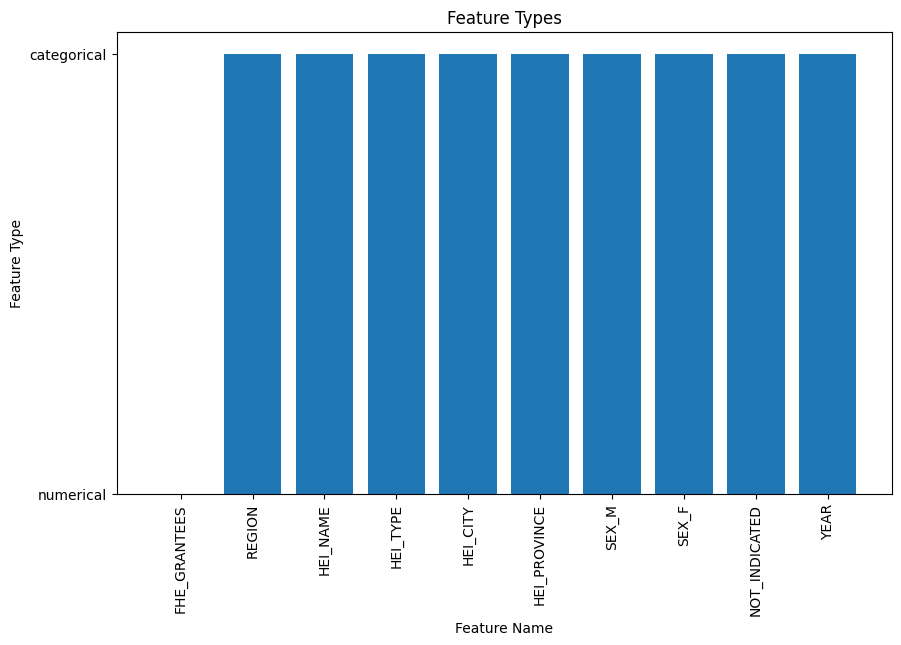

In [6]:
# identify features which are categorical
cat = df.select_dtypes(['object','category']).columns.to_list()

# identify features which are numerical
num = df.select_dtypes(['number']).columns.to_list()

# create dataframe identifying type of features
df_num_cat_col = pd.DataFrame(num+cat, columns=['Feature_Name'])
df_num_cat_col['Feature_Type'] = df_num_cat_col.where(
    ~df_num_cat_col['Feature_Name'].isin(cat),
    'categorical').where(df_num_cat_col['Feature_Name'].isin(cat),
                         'numerical')

# create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_num_cat_col['Feature_Name'], df_num_cat_col['Feature_Type'])
plt.xticks(rotation=90)
plt.xlabel('Feature Name')
plt.ylabel('Feature Type')
plt.title('Feature Types')

# display the plot
plt.show()

##### Identify the Correct Numerical and Categorical Columns Manually (Don't Forget to Edit the Cell Below)

In [7]:
# identify numerical columns manually
num_col = ['SEX_M', 'SEX_F', 'NOT_INDICATED', 'FHE_GRANTEES']

# identify categorical columns manually
cat_col = ['REGION', 'HEI_NAME', 'HEI_TYPE', 'HEI_CITY', 'HEI_PROVINCE',
               'YEAR']

In [8]:
# convert data type of numerical columns to correct ones
for col in num_col:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
# check if columns are converted to the correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REGION         936 non-null    object 
 1   HEI_NAME       936 non-null    object 
 2   HEI_TYPE       936 non-null    object 
 3   HEI_CITY       936 non-null    object 
 4   HEI_PROVINCE   936 non-null    object 
 5   FHE_GRANTEES   936 non-null    int64  
 6   SEX_M          918 non-null    float64
 7   SEX_F          918 non-null    float64
 8   NOT_INDICATED  215 non-null    float64
 9   YEAR           936 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 73.3+ KB


#### Identify Numerical and Categorical Columns for the Data (Demo for Automatic Selection)

In [10]:
# note that you have first to make sure that the columns are of the correct data type
# identify numerical columns automatically
num_col = df.select_dtypes(['number']).columns.to_list()

# identify categorical columns automatically
cat_col = df.select_dtypes(['object','category']).columns.to_list()

In [11]:
# check if the columns are identifed correctly
print('Numerical Columns')
print(num_col)
print('Categorical Columns')
print(cat_col)

Numerical Columns
['FHE_GRANTEES', 'SEX_M', 'SEX_F', 'NOT_INDICATED']
Categorical Columns
['REGION', 'HEI_NAME', 'HEI_TYPE', 'HEI_CITY', 'HEI_PROVINCE', 'YEAR']


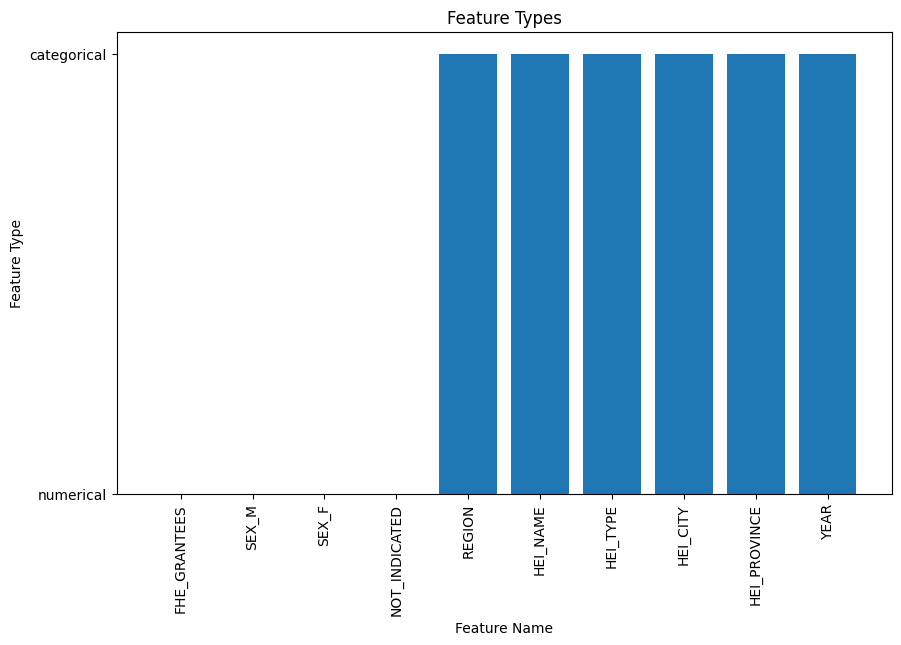

In [12]:
# identify features which are categorical
cat = df.select_dtypes(['object','category']).columns.to_list()

# identify features which are numerical
num = df.select_dtypes(['number']).columns.to_list()

# create dataframe identifying type of features
df_num_cat_col = pd.DataFrame(num+cat, columns=['Feature_Name'])
df_num_cat_col['Feature_Type'] = df_num_cat_col.where(
    ~df_num_cat_col['Feature_Name'].isin(cat),
    'categorical').where(df_num_cat_col['Feature_Name'].isin(cat),
                         'numerical')

# create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_num_cat_col['Feature_Name'], df_num_cat_col['Feature_Type'])
plt.xticks(rotation=90)
plt.xlabel('Feature Name')
plt.ylabel('Feature Type')
plt.title('Feature Types')

# display the plot
plt.show()

### Check for any Duplicate Records

In [13]:
# check for rows/records that are duplicated
df.duplicated().any()

False

In [14]:
# note that it is best practice to have a unique record identifier for each record for streamlined removal of duplicate records

# if there are duplicate records, you may run the code below to remove them
# df.drop_duplicates(keep='first', inplace=True)

### Check for Missing Values

In [15]:
# check if columns have missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   REGION         936 non-null    object 
 1   HEI_NAME       936 non-null    object 
 2   HEI_TYPE       936 non-null    object 
 3   HEI_CITY       936 non-null    object 
 4   HEI_PROVINCE   936 non-null    object 
 5   FHE_GRANTEES   936 non-null    int64  
 6   SEX_M          918 non-null    float64
 7   SEX_F          918 non-null    float64
 8   NOT_INDICATED  215 non-null    float64
 9   YEAR           936 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 73.3+ KB


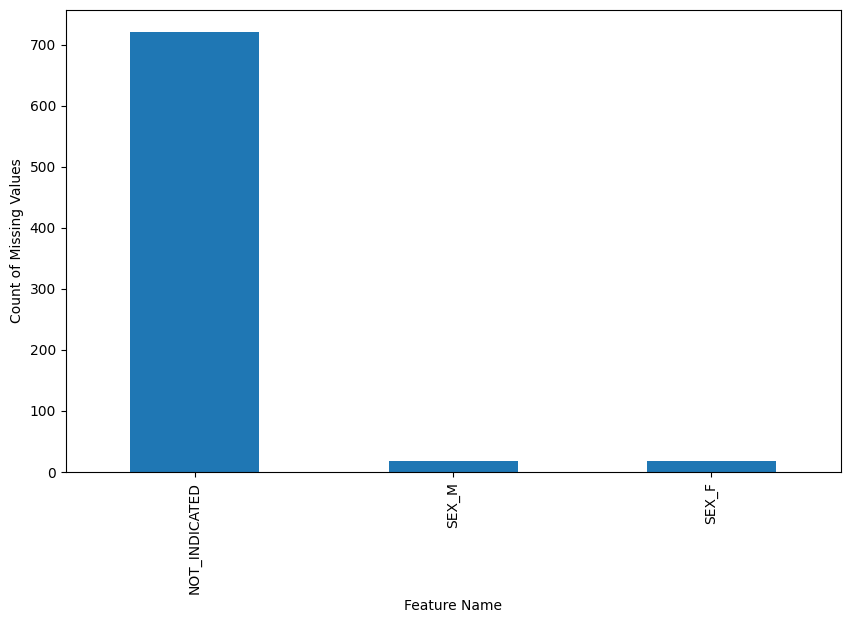

In [16]:
# create new data frame identifying columns with missing values
if df.isnull().sum().sum()>0:
    df_na = pd.DataFrame(df.isnull().sum(), columns=['count_na'])
    df_na = df_na[df_na['count_na']>0]

    # create bar plot for columns with missing values
    df_na['count_na'].sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
    plt.xlabel('Feature Name')
    plt.ylabel('Count of Missing Values')

    # display the plot
    plt.show()
else:
    print('The data does not contain missing values.')

### Simple Imputation on Missing Values

#### Do we include the "NOT_INDICATED" column in the imputation?

We do not include the `NOT_INDICATED` column since it is logical to say that empty values here mean `0` as its data point.

In [17]:
# get only the column that will be imputed with non-zero values
num_col_impute = ['SEX_M', 'SEX_F', 'FHE_GRANTEES']

#### Impute by Mean for Numerical Columns in the Data

In [18]:
# impute the mean of each column into the missing values for each column
df[num_col_impute] = df[num_col_impute].fillna(df[num_col_impute].mean())

In [19]:
# check for missing values for numerical columns with non-zero values
df[num_col_impute].isnull().any().any()

False

#### Replace Missing Values in "NOT_INDICATED" column with Zeroes

In [20]:
# get only the column that will be imputed with zero values
num_col_0 = ['NOT_INDICATED']

In [21]:
# replace missing values with zeroes
df[num_col_0] = df[num_col_0].fillna(0)

In [22]:
# check for missing values for numerical columns with zero values
df[num_col_0].isnull().any().any()

False

#### Impute by Mode for Categorical Columns in Data

In [23]:
# impute the mode of each column into the missing values for each column
df[cat_col] = df[cat_col].fillna(df[cat_col].mode().iloc[0])

In [24]:
# check for missing values for all categorical column
df[cat_col].isnull().any().any()

False

### Identify Number of Unique Values in all Features/Columns

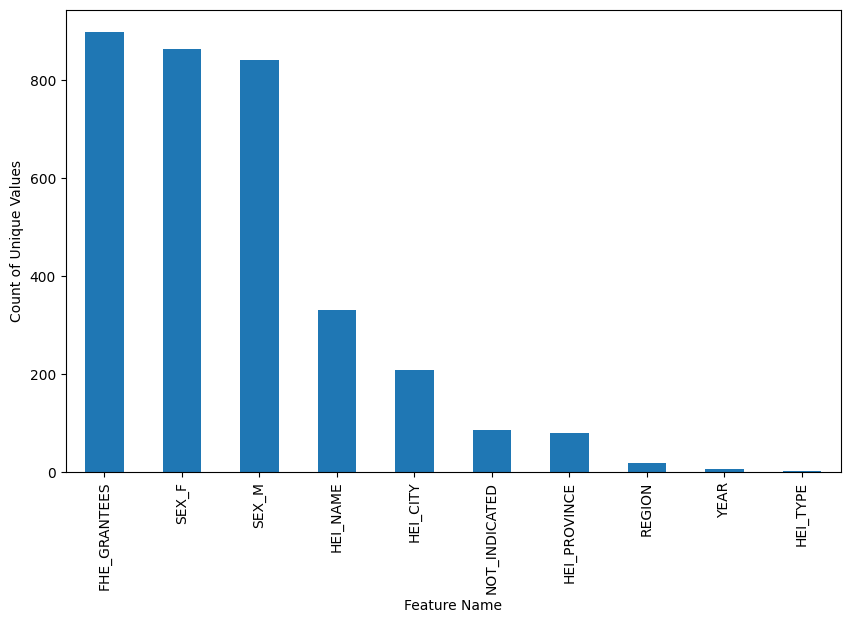

In [25]:
# create bar plot of unique values in each column
df.nunique().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.xlabel('Feature Name')
plt.ylabel('Count of Unique Values')

# display the plot
plt.show()

In [26]:
# check for columns that have less than or equal to 1 unique values
col_uniq_1 = list(df.columns[df.nunique() <= 1])
if len(col_uniq_1)>0:
    print(col_uniq_1)
else:
    print('No categorical columns that have less than or equal to 1 unique values.')

No categorical columns that have less than or equal to 1 unique values.


In [27]:
# if there is a column with only 1 unique value, remove the column with the code below
# df.drop(col_uniq_1, axis=1, inplace=True)

### Further Considerations

Always inspect the metadata of the given dataset for unique identifier column (e.g. `EmployeeID`). Unless there is a specific purpose in mind in the process of data analysis, this column should be removed as this is only an identifier of a record.

Below is an example of a column that act as a unique identifier.

| Feature Number | Feature Name | Feature Description |
| :---:        | :---        | :---          |
|10	|EmployeeNumber	|A unique identifier for each record of an employee

## Save the Pre-processed Data as Comma Separated Values (CSV)

In [28]:
# save the preprocessed data as csv file
path_out = 'fhe_clean_data.csv'
df.to_csv(path_out, sep=',', index=False)

## Activity (By Pair)

Group by pair and re-run this notebook on the TES Data. Note your observations and analyze the TES Data and try to answer the following questions:
- What are the similarities and differences between the TES and FHE data?
- Are there any missing values in the TES Data? If there are none, what could this indicate?
- What impact could the presence or absence of missing values have on the analysis and interpretation of the TES Data?

Presentation Instructions:

- Prepare a PowerPoint (PPT) presentation with 1-2 slides based on your findings.
- 2-3 groups will be called to present their findings.
- Each group is given 1 minute to present their findings.
- Ensure your presentation includes:
    - Slide 1: Introduction (briefly explain the purpose of the dataset)
    - Slide 2: Findings